In [141]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline 

### load data 

In [142]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [143]:
dataset.shape

(1338, 7)

In [144]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [145]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [146]:
dataset.describe(include='all').head()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414


In [ ]:
###missing value check 

In [147]:
dataset.isnull().head(3)

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False


In [148]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [149]:
dataset.shape

(1338, 7)

In [150]:
dataset = dataset.drop_duplicates(dataset)

In [151]:
dataset.shape

(1337, 7)

### Data Analycis 

C:\Users\H\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\H\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\H\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\H\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, U

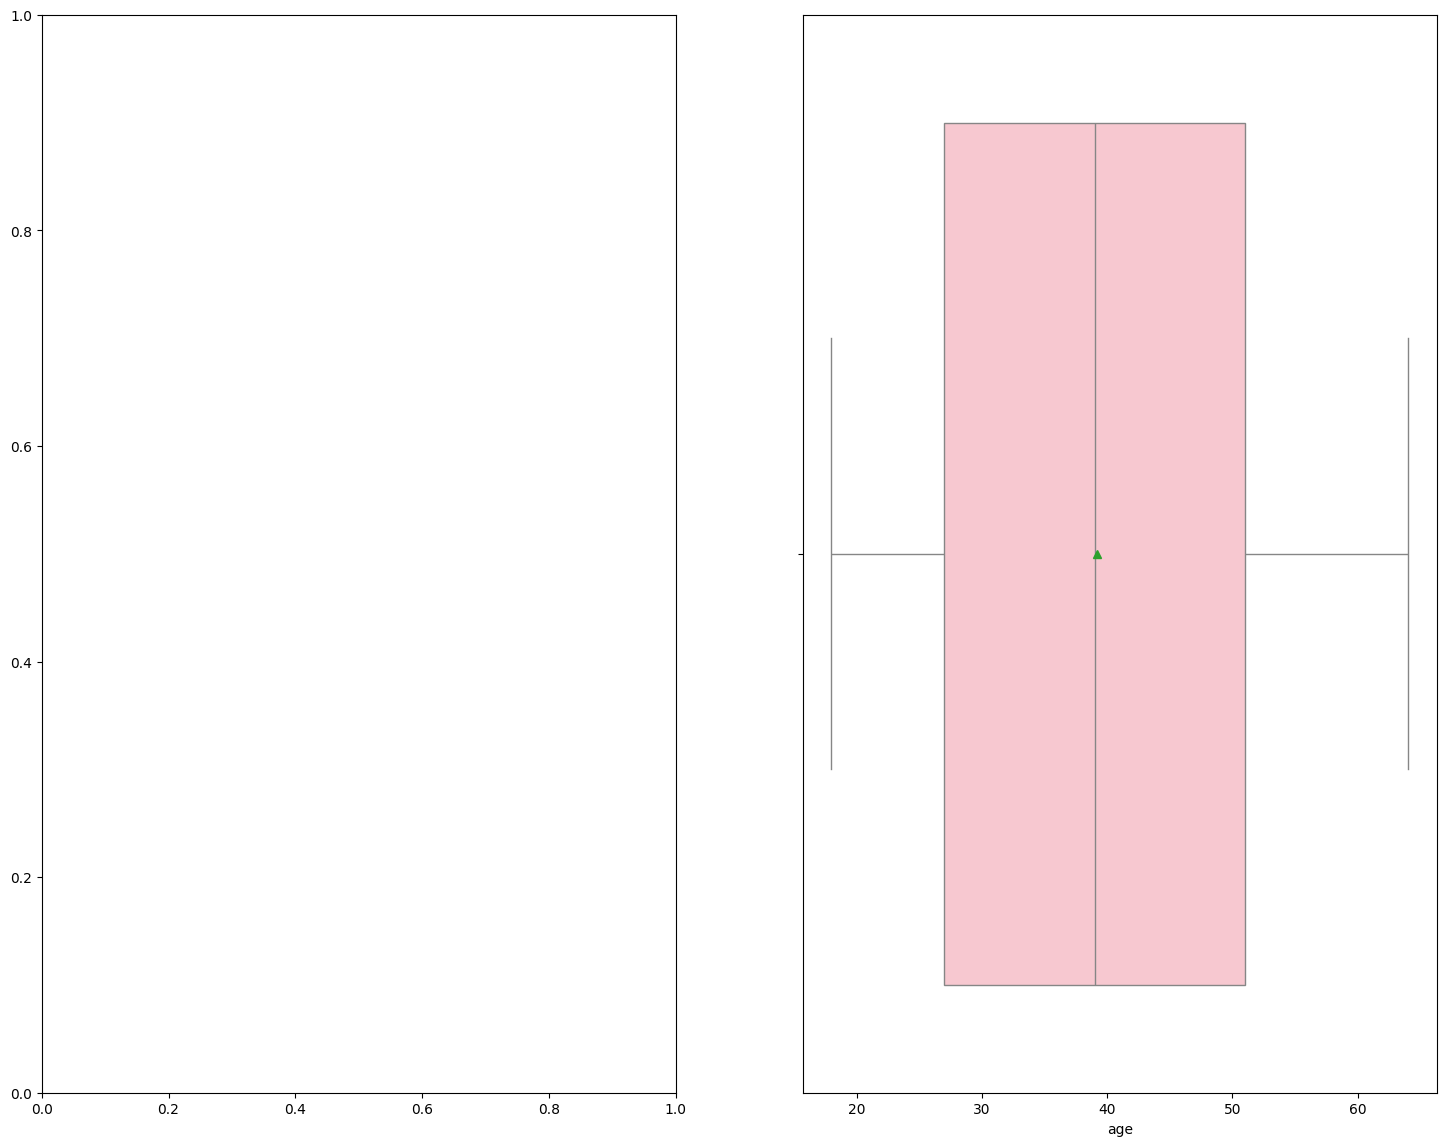

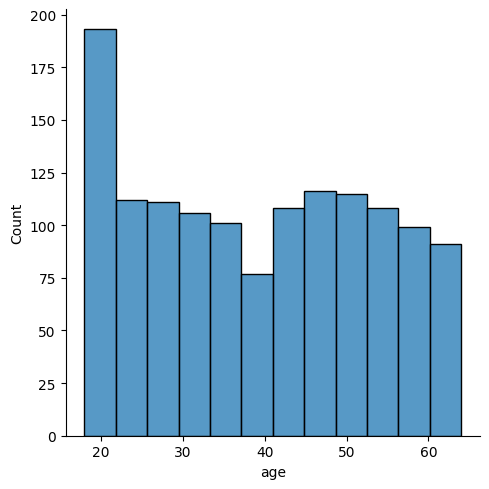

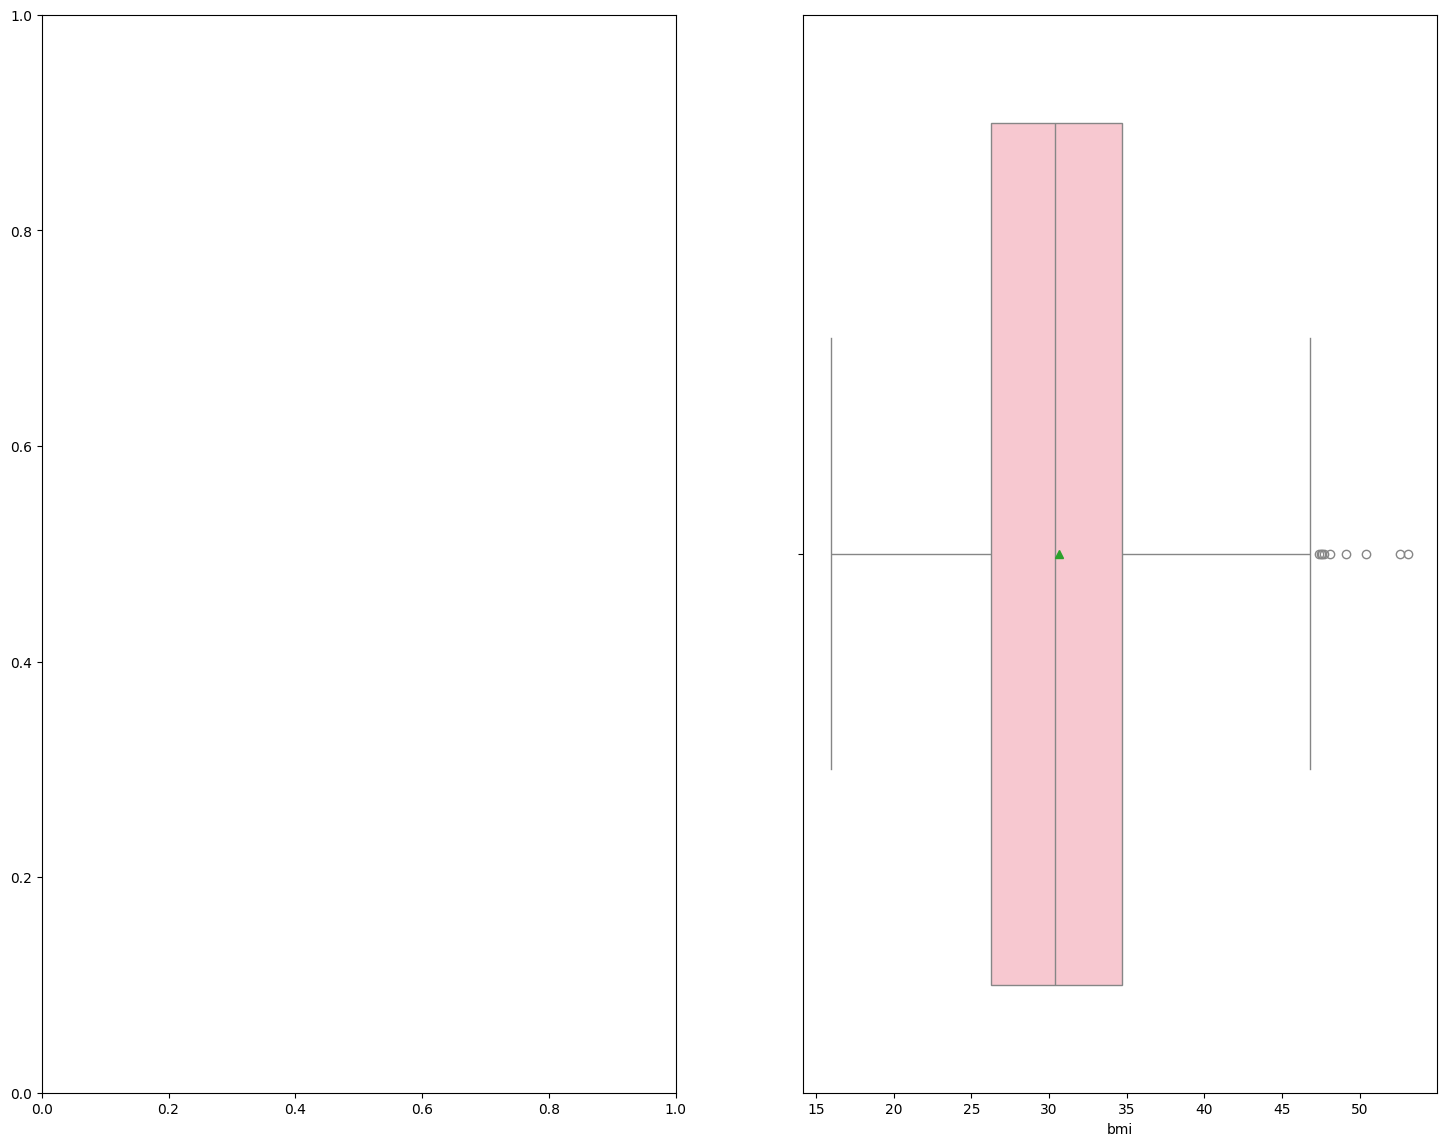

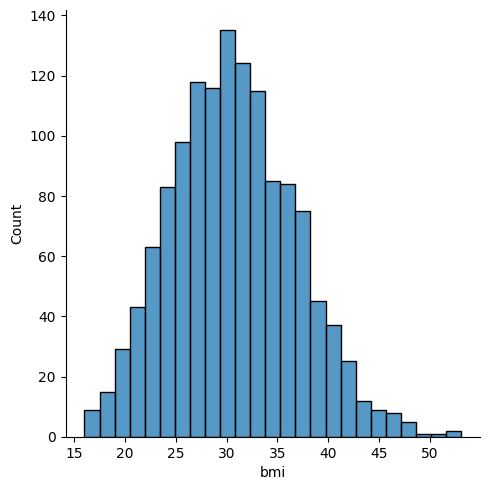

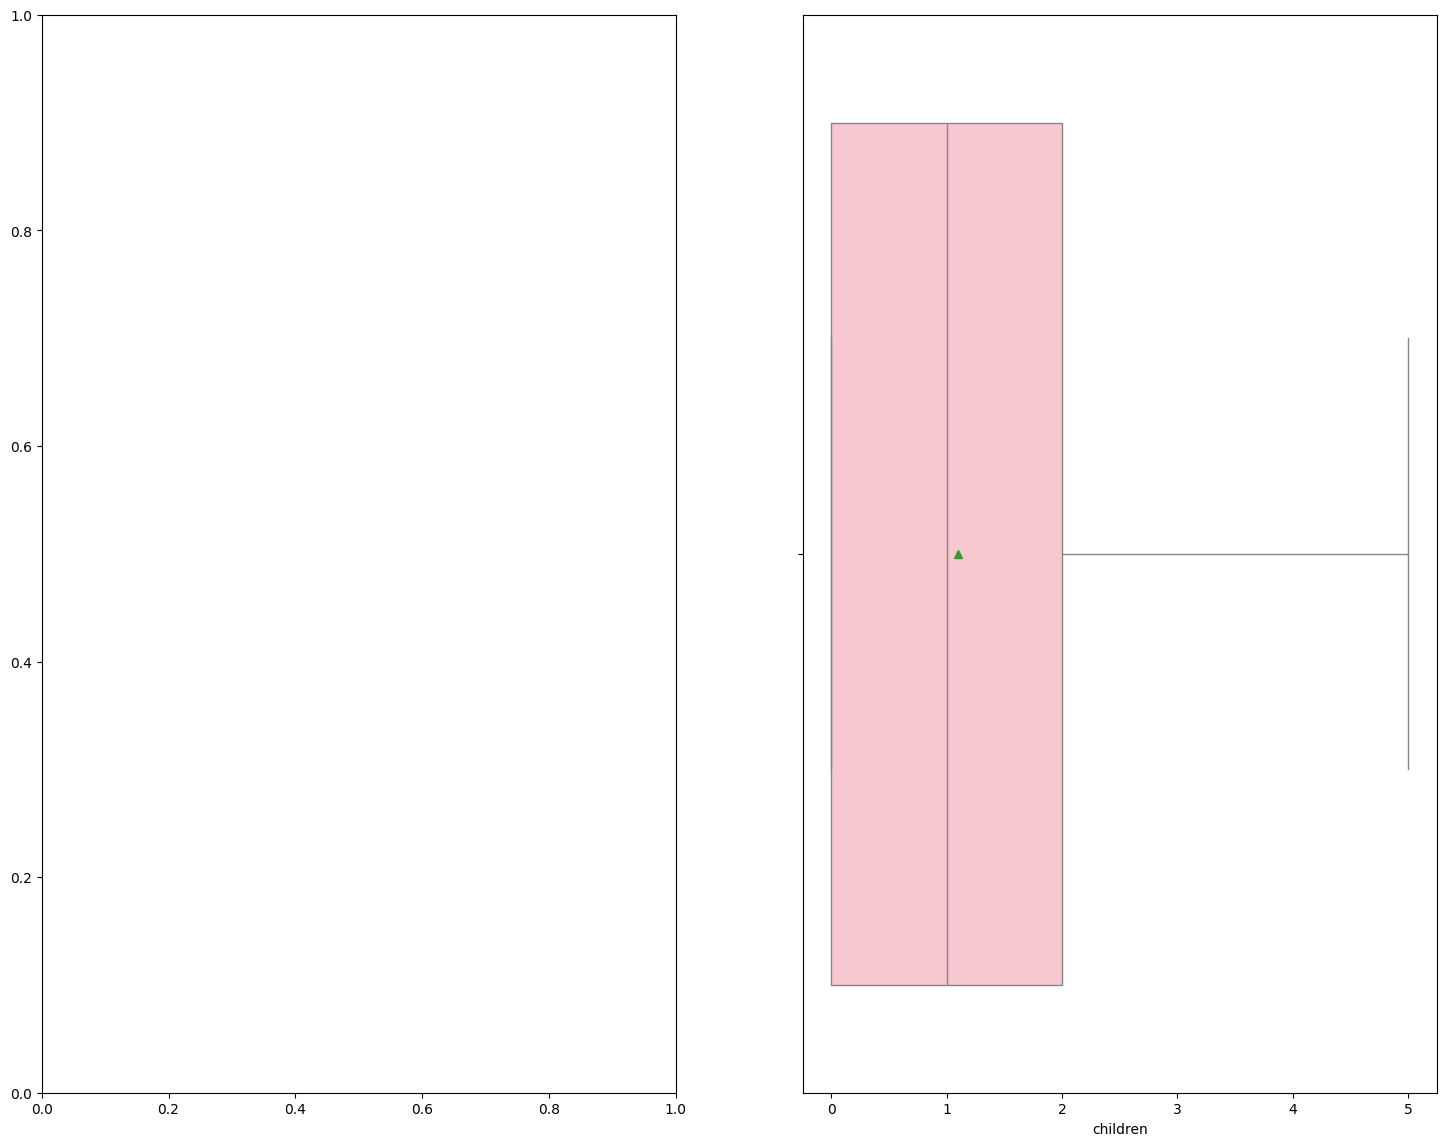

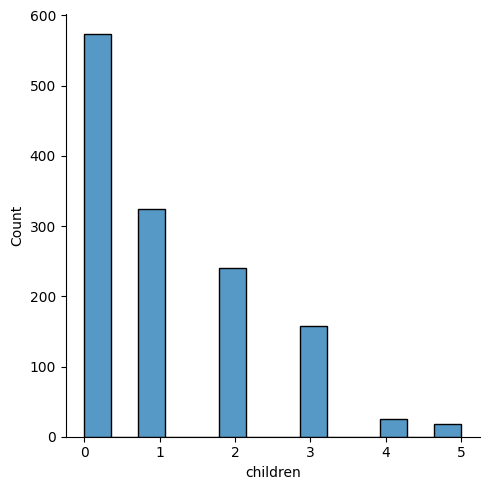

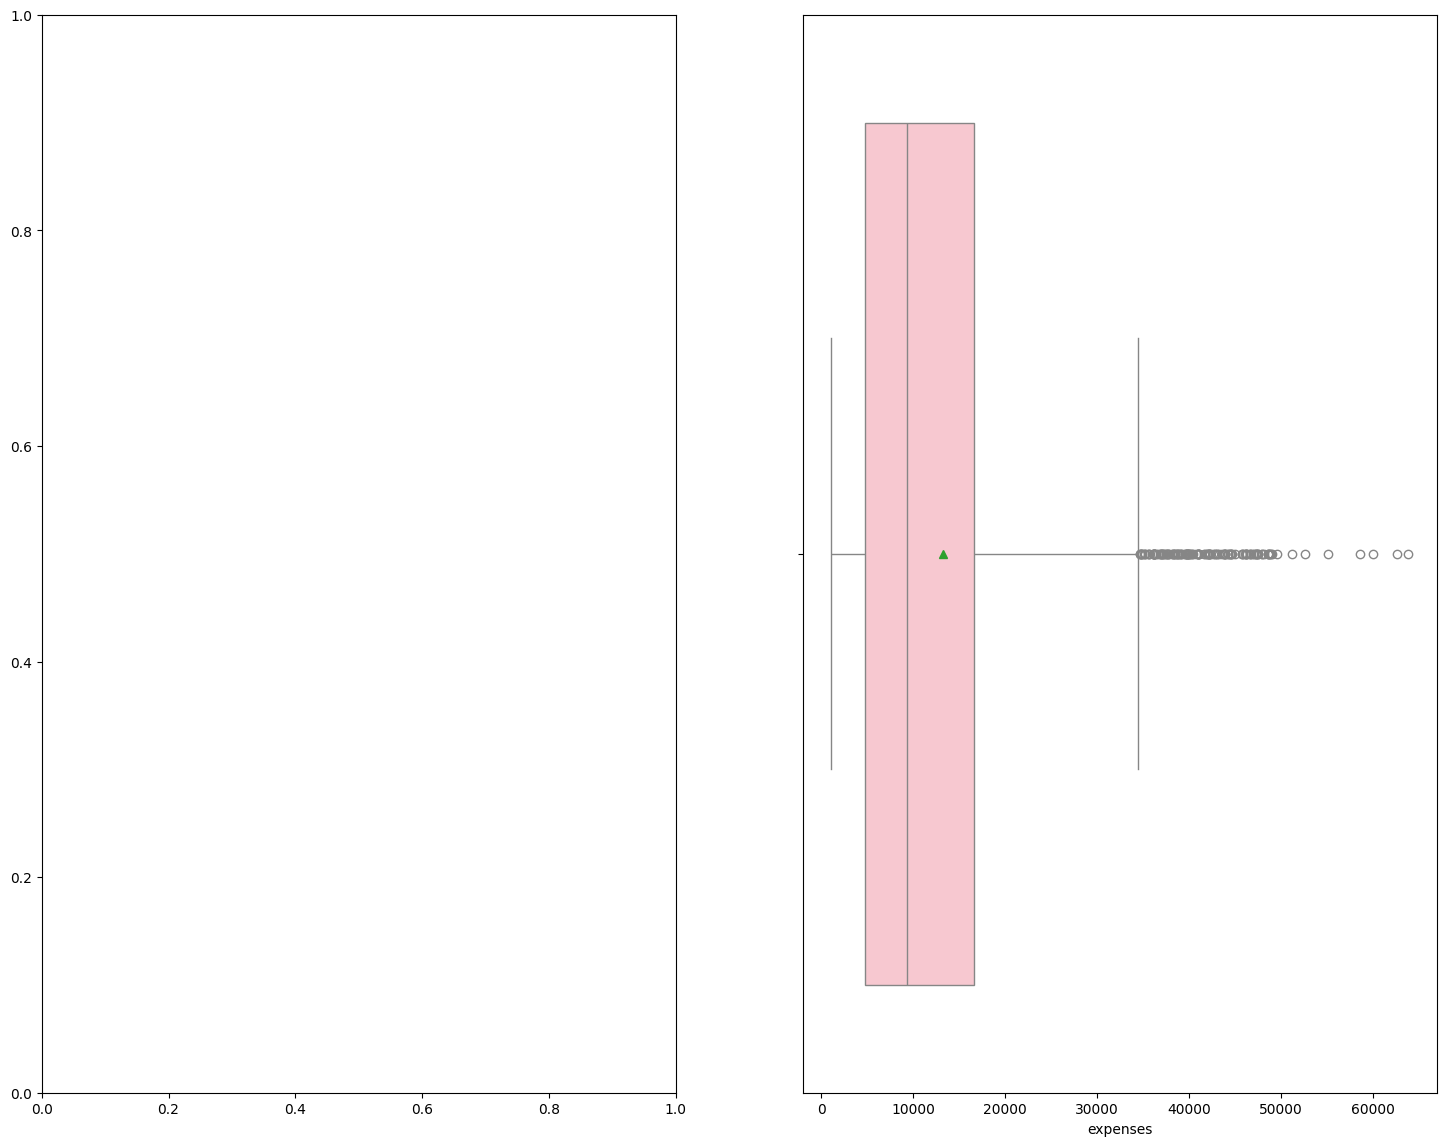

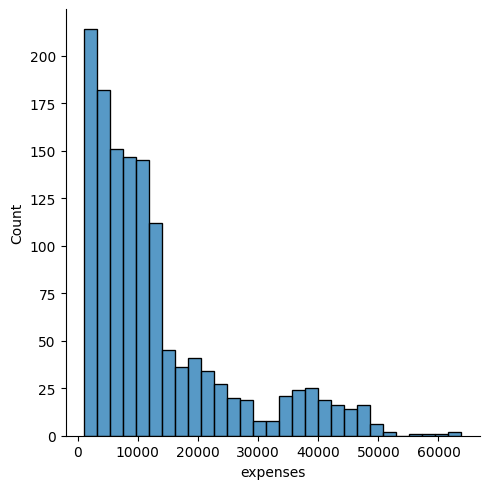

In [152]:
x_axis = ['age' , 'bmi' , 'children' , 'expenses' ]
for x in x_axis:
    fig , axes = plt.subplots(1,2, figsize=(18,14))
    sns.displot(dataset[x] , ax=axes[0] , kde=False)
    sns.boxplot(dataset[x] , ax = axes[1] , orient='h' , showmeans=True , color='pink')

### Handle Catagorical Values 

In [153]:
dataset.sex.unique()

array(['female', 'male'], dtype=object)

In [155]:
dataset['sex'] = dataset.sex.map({'female':0 , 'male':1})

In [156]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [157]:
dataset.smoker.unique()

array(['yes', 'no'], dtype=object)

In [158]:
dataset['smoker'] = dataset.smoker.map({'yes':1, 'no':0})

In [159]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [160]:
dataset.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [161]:
dataset['region'] = dataset['region'].map({'southeast':1 , 'southwest':2, 'northwest':3 , 'northeast':4})

In [162]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,2,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


### split the data

In [163]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [164]:
x = dataset.drop(['expenses'] , axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,2
1,18,1,33.8,1,0,1
2,28,1,33.0,3,0,1
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [81]:
y = dataset['expenses']
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

###Train Test Split 

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size=0.2 , random_state=42)

In [167]:
x_train.shape

(1069, 6)

In [168]:
y_train.shape

(1069,)

In [ ]:
### Model Trainng 

In [169]:
from sklearn.linear_model import LinearRegression

In [171]:
Lr = LinearRegression()

In [172]:
Lr.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [173]:
y_predict = Lr.predict(x_test)

In [174]:
from sklearn.metrics import r2_score

In [175]:
score1 = r2_score(y_test , y_predict)

In [177]:
score1 * 100 

80.68735177088384




##########  Using  Support Vector Mechience 





In [178]:
from sklearn.svm import SVR

In [179]:
svm = SVR()

In [180]:
svm.fit(x_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [190]:
y_predict2 = svm.predict(x_test)

from sklearn.metrics import r2_score

score2 = r2_score(y_test, y_predict2)
score2 * 100

-13.444765522841617

In [186]:


from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [188]:
rfr.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
_

In [199]:
y_predict3 = rfr.predict(x_test)

from sklearn.metrics import r2_score

score3 = r2_score(y_test, y_predict3)
score3 * 100

88.16254842611313

In [201]:
data = {

 'age':49 , 
 'sex':2,
    'bmi':35, 
    'children':5, 
    'smoker':1, 
    'region':3, 
    
    
}

In [203]:
new_df  = pd.DataFrame(data , index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,49,2,35,5,1,3


In [204]:
Check = rfr.predict(new_df)
Check[0]

np.float64(42238.44920000001)

In [206]:
import joblib 

In [207]:
joblib.dump(rfr , 'Random_forest_Regression')

['Random_forest_Regression']